# Radiative Exchange between Surfaces

In this notebook, a mathematical model of $\textbf{radiative heat transfer between surfaces}$ is presented.

## Goals

- Recalling concepts as $\textbf{heat flux}$, $\textbf{radiosity}$, $\textbf{irradiation}$, $\textbf{emissivity}$, $\textbf{absorptivity}$ and $\textbf{view factor}$
- Deriving the $\textbf{governing equation of radiative heat transfer}$
- Developing a physical intuition for the equation
- Assessing one's comprehension of the topic through short exercises

## Brief reminder

Let us get begin with a brief reminder of the basic concepts of heat transfer.

### Heat Flux

Heat flux is the quantity of thermal energy going through a surface per unit time.
One can define the heat flux in terms of two quantities : 

- $\textbf{Radiosity}$ (J): the rate at which radiative energy leaves a surface.
- $\textbf{Irradiation}$ (H): the rate at which radiative energy is absorbed by a surface.

Naturally, heat flux is the difference between the two.
$$\dot{q} = J - H \; (\star)$$

Thus, by convention, if $\dot{q} \gt 0$ then, more energy is emitted by the surface than absorbed per unit time. 

Alternatively, a surface's heat flux can be defined in terms of its:
- $\textbf{Emissivity}$($\epsilon$)
- $\textbf{Emissive power}$($E_b$)
- $\textbf{Absorptivity}$($\alpha$)
- $\textbf{Irradiation}$ (H)

This yields the following:

$$\dot{q} = \epsilon E_b - \alpha H $$ 

**Assumption**: we will assume that we are working only with gray diffuse surfaces, where $\epsilon = \alpha$.

We are left with the following relation:
$$\dot{q} = \epsilon (E_b - H)\; (1)$$

### Radiosity

Radiosity is the rate at which radiative energy leaves a surface by emission and reflection. This quantity is denoted by J in this course. Note that $J\geq0$.

Using the two definitions for heat flux, we can define a surface's radiosity in terms of its emissivity, its emitted power and its heat flux:

$$ \dot{q} = J - H $$
$$\iff H = J - \dot{q} \> (2)$$


$$ \epsilon (E_b - H) $$
$$\iff H = E_b - \frac{\dot{q}}{\epsilon}\> (3) $$



$$ (2) = (3) \iff J - \dot{q} = E_b - \frac{\dot{q}}{\epsilon}$$
$$ \iff J = E_b - \frac{1 - \epsilon}{\epsilon}\dot{q}$$

This proves useful in deriving the governing equation.

### Irradiation

Irradiation is the rate at which radiative energy is absorbed by a surface. Hence, it is the complement to radiosity. This quantity is denoted by H in this course. Note that $H\geq0$.

### Emissivity

The emissivity of a surface is the proportion of emitted power effectively leaving the surface.

This factor is usually denoted by $\epsilon$ and $0 \leq \epsilon \leq 1$.

### Absorptivity

The absorptivity of a surface is the proportion of the incident radiant energy that is absorbed.

This factor is usually denoted by $\alpha$ and $0 \leq \alpha \leq 1$.

### View Factor

View factor between two finite surface elements ≡ ratio of energy leaving
$A_i$ per unit time directly toward and intercepted by $A_j$ to all energy leaving $A_i$
per unit time

#### Place an example here

## Formula derivation

### Interpretation

### Simulation

<ipython-input-1-cfa83a3b2a72>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


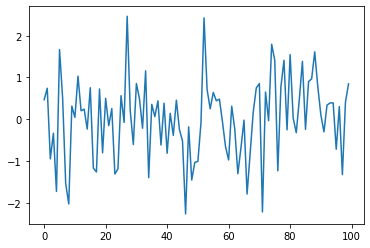

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

In [1]:
# origin code : https://plotly.com/python/figurewidget-app/

import datetime
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import widgets

# df = pd.read_csv('https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
# df = df.drop(df.columns[[0]], axis=1)
# df['carrier'].unique()

In [19]:
df = {}

emissivity_step_nb = 100
emissivity = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=1.0,
    step=1/emissivity_step_nb,
    description='Proportional emissivity',
    continuous_update=False
)
df['emissivity'] = []
for i in range(emissivity_step_nb+1):
    df['emissivity'].append(i/emissivity_step_nb)

external_radiosity_max_value = 12
external_radiosity_step_size = 1
external_radiosity = widgets.IntSlider(
    value=1.0 * external_radiosity_step_size,
    min=1.0 * external_radiosity_step_size,
    max=external_radiosity_max_value,
    step=external_radiosity_step_size,
    description='External radiosity:',
    continuous_update=False
)
df['external_radiosity'] = []
for i in range(external_radiosity_step_size, external_radiosity_max_value+1, external_radiosity_step_size):
    df['external_radiosity'].append(i)

emissive_power_max_value = 12

emissive_power_step_size = 1
emissive_power = widgets.IntSlider(
    value=1.0 * emissive_power_step_size,
    min=1.0 * emissive_power_step_size,
    max=emissive_power_max_value,
    step=emissive_power_step_size,
    description='Emissivity of equivalent black body:',
    continuous_update=False
)
df['emissive_power'] = []
for i in range(emissive_power_step_size, emissive_power_max_value+1, emissive_power_step_size):
    df['emissive_power'].append(i)

data = []
for epsilon in range(emissivity_step_nb):
    for Eb in range(external_radiosity_step_size, external_radiosity_max_value, external_radiosity_step_size):
        for E0 in range(emissive_power_step_size, emissive_power_max_value, emissive_power_step_size):
            data.append({'q_dot':epsilon * (Eb - E0),
                         'emissive_power': E0,
                        'external_radiosity': Eb,
                        'emissivity': epsilon
                        })

df = pd.DataFrame(data)
print(df)

       q_dot  emissive_power  external_radiosity  emissivity
0          0               1                   1           0
1          0               2                   1           0
2          0               3                   1           0
3          0               4                   1           0
4          0               5                   1           0
...      ...             ...                 ...         ...
12095    396               7                  11          99
12096    297               8                  11          99
12097    198               9                  11          99
12098     99              10                  11          99
12099      0              11                  11          99

[12100 rows x 4 columns]


In [18]:
container = widgets.VBox(children=[emissivity, external_radiosity, emissive_power])

# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['q_dot'], opacity=0.75, name='q dot')
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Heat Quantity simulation'
                        ),
                        barmode='overlay'
                    ))

def validate():
    if emissivity.value in df['emissivity'] \
            and external_radiosity.value in df['external_radiosity'] \
            and emissive_power.value in df['emissive_power']:
        return True
    else:
        return False


def response(change):
    if validate():
        filter_list = []
        for i, j, k in zip( emissivity.value == np.array(df['emissivity']),
                            df['external_radiosity'] == external_radiosity.value,
                            df['emissive_power'] == emissive_power.value
                           ):
            filter_list.append(i and j and k)
        temp_df = df[filter_list]

        x1 = temp_df['q_dot']
        with g.batch_update():
            g.data[0].x = x1
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = ''
            g.layout.yaxis.title = 'q dot value'


emissive_power.observe(response, names="value")
external_radiosity.observe(response, names="value")
emissivity.observe(response, names="value")

# container2 = widgets.HBox([emissive_power, external_radiosity])
widgets.VBox([container,
              # container2,
              g])